<a href="https://colab.research.google.com/github/Rosh-pvr/Neural_networks/blob/main/Neural_networks_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

add 3 integers

In [1]:
import tensorflow as tf
import numpy as np

# Create variables
a = tf.Variable(5.0, name='a')
b = tf.Variable(3.0, name='b')
c = tf.Variable(0.0, name='c')

# Simple addition model
@tf.function
def add_numbers():
    c.assign(a + b)
    return c

# Test the model
result = add_numbers()
print(f"The sum of {a.numpy()} and {b.numpy()} is: {result.numpy()}")

# Vector addition example
vector_a = tf.constant([1.0, 2.0, 3.0])
vector_b = tf.constant([4.0, 5.0, 6.0])
vector_c = tf.add(vector_a, vector_b)
print(f"Vector addition result: {vector_c.numpy()}")

The sum of 5.0 and 3.0 is: 8.0
Vector addition result: [5. 7. 9.]


implement employment through neural networks

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic unemployment data (as we don't have a built-in dataset)
np.random.seed(42)
months = np.arange(1, 121)  # 10 years of data
unemployment_rate = 5 + np.sin(months/12 * 2*np.pi) * 2 + np.random.normal(0, 0.5, 120)
gdp_growth = 2 + np.cos(months/12 * 2*np.pi) * 1.5 + np.random.normal(0, 0.3, 120)
features = np.column_stack([months, gdp_growth])

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, unemployment_rate, test_size=0.2)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build regression model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100, batch_size=16, verbose=0)

# Evaluate
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest MAE: {test_mae:.2f}%")

# Make prediction
sample_input = scaler.transform([[24, 2.5]])  # 2 years, 2.5% GDP growth
prediction = model.predict(sample_input)
print(f"Predicted unemployment rate: {prediction[0][0]:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.7609 - mae: 1.0705

Test MAE: 1.07%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted unemployment rate: 4.71%


multi layer perceptron

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build MLP model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5592 - loss: 0.6821 - val_accuracy: 0.8250 - val_loss: 0.5403
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8325 - loss: 0.4854 - val_accuracy: 0.8500 - val_loss: 0.4427
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8509 - loss: 0.3939 - val_accuracy: 0.8350 - val_loss: 0.3945
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8726 - loss: 0.3349 - val_accuracy: 0.8450 - val_loss: 0.3805
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8676 - loss: 0.3184 - val_accuracy: 0.8450 - val_loss: 0.3763
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8888 - loss: 0.2866 - val_accuracy: 0.8450 - val_loss: 0.3774
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8980 - loss: 0.2644 - val_accuracy: 0.8550 - val_loss: 0.3740
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9052 - loss: 0.2695 - val_accuracy: 0.8450 - val_loss: 0.3772
Epo

Dataset Analysis with Feed Forward Network

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


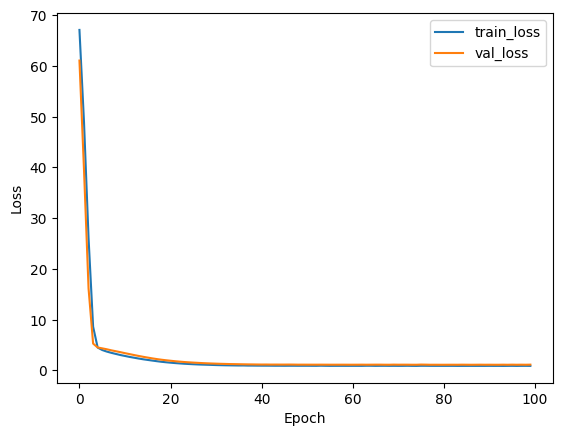

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3625 

Test MSE: 1.1501
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


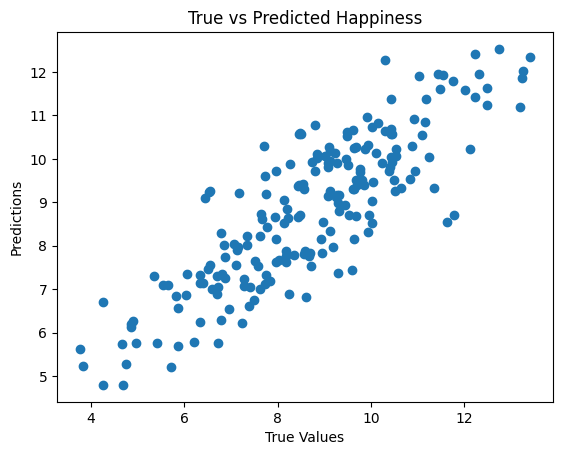

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create synthetic dataset
data = {
    'age': np.random.randint(18, 65, 1000),
    'income': np.random.normal(50000, 15000, 1000),
    'education_years': np.random.randint(8, 20, 1000),
    'happiness': np.random.randint(1, 11, 1000)
}
df = pd.DataFrame(data)
df['happiness'] = df['age']*0.1 + df['income']*0.00001 + df['education_years']*0.3 + np.random.normal(0, 1, 1000)

# Prepare data
X = df[['age', 'income', 'education_years']]
y = df['happiness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build feed forward network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=0)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate
test_loss = model.evaluate(X_test, y_test)
print(f"\nTest MSE: {test_loss:.4f}")

# Analyze predictions
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Happiness')
plt.show()

CNN Image Classifier

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.2056 - loss: 1.5890 - val_accuracy: 0.0000e+00 - val_loss: 3.0028
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1684 - loss: 1.4728 - val_accuracy: 0.0000e+00 - val_loss: 3.5988
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3319 - loss: 1.3746 - val_accuracy: 0.0000e+00 - val_loss: 4.7386
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3417 - loss: 1.3613 - val_accuracy: 0.0000e+00 - val_loss: 5.8259
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3826 - loss: 1.3325 - val_accuracy: 0.0000e+00 - val_loss: 6.0315
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3858 - loss: 1.2964 - val_accuracy: 0.0000e+00 - val_loss: 6.2967
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7837 - loss: 1.2492 - val_accuracy: 0.0000e+00 - val_loss: 6.7378
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5688 - loss: 1.2138 - val_accuracy: 0.0000e+0

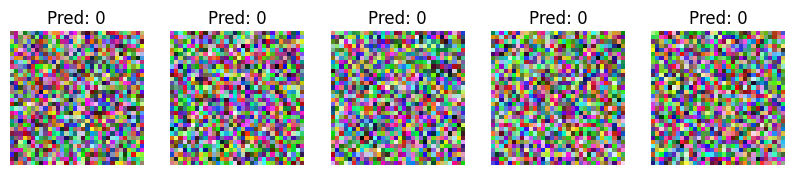

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic image dataset (since we don't have actual images)
num_classes = 5
samples_per_class = 10
img_height = 32
img_width = 32
channels = 3

# Generate random images and labels
X = np.random.randint(0, 256, size=(num_classes*samples_per_class, img_height, img_width, channels), dtype=np.uint8)
y = np.repeat(np.arange(num_classes), samples_per_class)

# Convert to float and normalize
X = X.astype('float32') / 255.0

# Convert labels to one-hot encoding
y = keras.utils.to_categorical(y, num_classes)

# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X, y,
                    epochs=30,
                    batch_size=8,
                    validation_split=0.2,
                    verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(X, y)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Display sample predictions
sample_images = X[:5]
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"Pred: {predicted_classes[i]}")
    plt.axis('off')
plt.show()

Hyperparameter Tuning

In [7]:
# Install keras-tuner if not already installed
!pip install keras-tuner

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import keras_tuner as kt

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define model builder function for hyperparameter tuning
def build_model(hp):
    model = keras.Sequential()

    # Tune number of layers
    for i in range(hp.Int('num_layers', 1, 3)):
        # Tune number of units
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))

    # Tune learning rate
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize tuner
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=20,
                     factor=3,
                     directory='tuning',
                     project_name='hyperparam_tuning')

# Perform hyperparameter search
tuner.search(X_train, y_train,
             epochs=50,
             validation_data=(X_test, y_test),
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

# Get best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best hyperparameters:
- Number of layers: {best_hps.get('num_layers')}
- Units in layer 0: {best_hps.get('units_0')}
- Learning rate: {best_hps.get('learning_rate')}
""")

# Build and train final model with best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy with optimized hyperparameters: {test_acc:.4f}")

Trial 30 Complete [00h 00m 03s]
val_accuracy: 0.824999988079071

Best val_accuracy So Far: 0.8550000190734863
Total elapsed time: 00h 01m 09s

Best hyperparameters:
- Number of layers: 1
- Units in layer 0: 64
- Learning rate: 0.01

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7952 - loss: 0.4983 - val_accuracy: 0.8150 - val_loss: 0.3897
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8838 - loss: 0.2804 - val_accuracy: 0.8400 - val_loss: 0.3735
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8964 - loss: 0.2844 - val_accuracy: 0.8300 - val_loss: 0.3906
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8985 - loss: 0.2615 - val_accuracy: 0.8150 - val_loss: 0.3996
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9181 - loss: 0.2108 - val_accuracy: 0.8250 - val_loss: 0.3787
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9319 - loss: 0.2260 - val_accuracy: 0.8400 - val_loss: 0.4135
Epoc

Transfer Learning for Image Classification

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset but use only a subset
(X_train_full, y_train_full), (X_test_full, y_test_full) = keras.datasets.cifar10.load_data()

# Take only 20% of the data to make it faster
sample_size = 0.2
train_samples = int(len(X_train_full) * sample_size)
test_samples = int(len(X_test_full) * sample_size)

X_train = X_train_full[:train_samples]
y_train = y_train_full[:train_samples]
X_test = X_test_full[:test_samples]
y_test = y_test_full[:test_samples]

# Normalize pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Load pre-trained VGG16 model (without top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
base_model.trainable = False

# Create new model on top
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Reduced from 256 to 128
    layers.Dropout(0.3),  # Reduced from 0.5 to 0.3
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model with fewer epochs
print("Initial training:")
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=5,  # Reduced from 10 to 5
                    validation_data=(X_test, y_test),
                    verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nInitial Test Accuracy: {test_acc:.4f}")

# Fine-tuning (unfreeze some layers)
base_model.trainable = True
for layer in base_model.layers[:15]:
    layer.trainable = False

model.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training with fewer epochs
print("\nFine-tuning:")
history_fine = model.fit(X_train, y_train,
                         batch_size=32,
                         epochs=3,  # Reduced from 5 to 3
                         validation_data=(X_test, y_test),
                         verbose=1)

# Final evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nFinal Test Accuracy after fine-tuning: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Initial Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Initial Val Accuracy')
plt.title('Initial Training')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_fine.history['accuracy'], label='Fine-tune Train Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Fine-tune Val Accuracy')
plt.title('Fine-tuning')
plt.legend()
plt.show()

Hospital Dataset with MobileNetV2

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic medical image dataset (since we don't have actual hospital dataset)
num_classes = 3  # e.g., ['normal', 'pneumonia', 'covid']
samples_per_class = 30
img_height = 224  # MobileNetV2 expects at least 224x224
img_width = 224
channels = 3

# Generate random images and labels
X = np.random.randint(0, 256, size=(num_classes*samples_per_class, img_height, img_width, channels), dtype=np.uint8)
y = np.repeat(np.arange(num_classes), samples_per_class)

# Convert to float and normalize
X = X.astype('float32') / 255.0

# Convert labels to one-hot encoding
y = keras.utils.to_categorical(y, num_classes)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Load pre-trained MobileNetV2
base_model = MobileNetV2(input_shape=(img_height, img_width, 3),
                         include_top=False,
                         weights='imagenet')

# Freeze base model
base_model.trainable = False

# Create new model on top
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train,
                    batch_size=16,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Fine-tuning (unfreeze some layers)
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

model.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training
history_fine = model.fit(X_train, y_train,
                         batch_size=16,
                         epochs=5,
                         validation_data=(X_test, y_test),
                         verbose=1)

# Final evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy after fine-tuning: {test_acc:.4f}")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 636ms/step - accuracy: 0.2798 - loss: 1.4948 - val_accuracy: 0.5000 - val_loss: 1.0840
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 364ms/step - accuracy: 0.4025 - loss: 1.1923 - val_accuracy: 0.2222 - val_loss: 1.1797
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 342ms/step - accuracy: 0.3296 - loss: 1.2331 - val_accuracy: 0.1667 - val_loss: 1.2419
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 347ms/step - accuracy: 0.4045 - loss: 1.1748 - val_accuracy: 0.1667 - val_loss: 1.2408
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 495ms/step - accuracy: 0.3750 - loss: 1.1348 - val_accuracy: 0.2222 - val_loss: 1.1830
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 413ms/step - accuracy: 0.3504 - loss: 1.1658 - val_accuracy: 0.2778 - val_loss: 1.1363
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 347ms/step - accuracy: 0.3718 - loss: 1.1445 - val_accuracy: 0.3333 - val_loss: 1.1267
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step - accuracy: 0.3047 

Sentiment Analysis with RNN

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Create synthetic sentiment analysis dataset
texts = [
    "I love this product, it's amazing!",
    "This is the worst thing I've ever bought.",
    "It's okay, not great but not terrible either.",
    "Absolutely fantastic! Would buy again.",
    "Complete waste of money, very disappointed.",
    "Better than expected, happy with my purchase.",
    "Not what I was hoping for, quite bad.",
    "Excellent quality and fast delivery!",
    "Poor customer service and faulty product.",
    "I'm satisfied with this purchase."
]
labels = np.array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1])  # 1=positive, 0=negative

# Tokenize text
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences
max_length = 10
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2)

# Build RNN model
model = keras.Sequential([
    layers.Embedding(input_dim=1000, output_dim=16, input_length=max_length),
    layers.SimpleRNN(32),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Test with new text
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')
    prediction = model.predict(padded)
    return "Positive" if prediction > 0.5 else "Negative"

print("\nSample predictions:")
print("'I really like this' ->", predict_sentiment("I really like this"))
print("'This is terrible' ->", predict_sentiment("This is terrible"))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 0.7098 - val_accuracy: 1.0000 - val_loss: 0.6607
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6250 - loss: 0.6941 - val_accuracy: 1.0000 - val_loss: 0.6614
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7500 - loss: 0.6789 - val_accuracy: 1.0000 - val_loss: 0.6625
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.8750 - loss: 0.6638 - val_accuracy: 1.0000 - val_loss: 0.6619
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8750 - loss: 0.6487 - val_accuracy: 1.0000 - val_loss: 0.6598
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8750 - loss: 0.6331 - val_accuracy: 1.0000 - val_loss: 0.6570
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8750 - loss: 0.6167 - val_accuracy: 1.0000 - val_loss: 0.6538
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.8750 - loss: 0.5994 - val_accuracy: 1.0000 - val_loss: 0.6501
Epoch 9/50


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
'I really like this' -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
'This is terrible' -> Negative


 LSTM-based Autoencoder

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.5403 - val_loss: 0.5310
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.5407 - val_loss: 0.5091
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.4839 - val_loss: 0.3862
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.3585 - val_loss: 0.2345
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2296 - val_loss: 0.1413
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1852 - val_loss: 0.1109
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1298 - val_loss: 0.0746
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0782 - val_loss: 0.0584
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0605 - val_loss: 0.0469
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0480 - val_loss: 0.0401
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0397 - val_loss: 0.0367
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


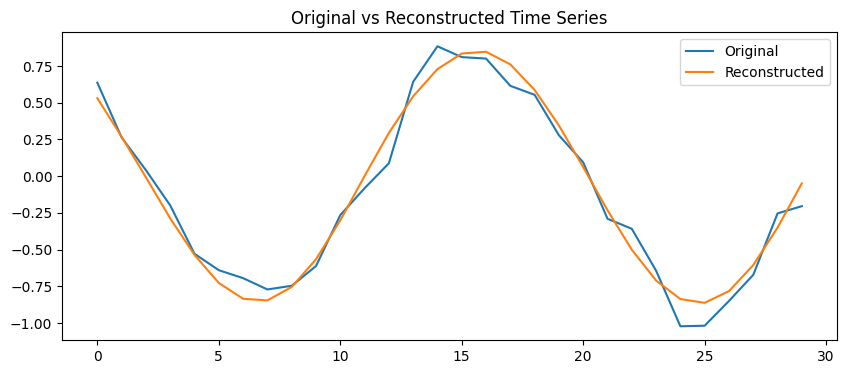

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step  
Mean reconstruction error: 0.0109


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic time series data
def generate_time_series(num_samples, seq_length):
    time = np.linspace(0, 10, seq_length)
    data = []
    for _ in range(num_samples):
        phase = np.random.uniform(0, 2*np.pi)
        amplitude = np.random.uniform(0.5, 1.5)
        noise = np.random.normal(0, 0.1, seq_length)
        series = amplitude * np.sin(time + phase) + noise
        data.append(series)
    return np.array(data)

num_samples = 1000
seq_length = 30
X = generate_time_series(num_samples, seq_length)
X = X.reshape((num_samples, seq_length, 1))  # Add channel dimension

# Split data
X_train, X_test = train_test_split(X, test_size=0.2)

# Build LSTM Autoencoder
latent_dim = 8

# Encoder
encoder_input = keras.Input(shape=(seq_length, 1))
x = layers.LSTM(32, return_sequences=True)(encoder_input)
x = layers.LSTM(16)(x)
encoder_output = layers.Dense(latent_dim)(x)
encoder = keras.Model(encoder_input, encoder_output)

# Decoder
decoder_input = keras.Input(shape=(latent_dim,))
x = layers.RepeatVector(seq_length)(decoder_input)
x = layers.LSTM(16, return_sequences=True)(x)
x = layers.LSTM(32, return_sequences=True)(x)
decoder_output = layers.TimeDistributed(layers.Dense(1))(x)
decoder = keras.Model(decoder_input, decoder_output)

# Autoencoder
autoencoder_input = keras.Input(shape=(seq_length, 1))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = keras.Model(autoencoder_input, decoded)

autoencoder.compile(optimizer='adam', loss='mse')

# Train model
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=32,
                          validation_data=(X_test, X_test),
                          verbose=1)

# Visualize reconstruction
sample = X_test[0:1]
reconstructed = autoencoder.predict(sample)

plt.figure(figsize=(10, 4))
plt.plot(sample[0, :, 0], label='Original')
plt.plot(reconstructed[0, :, 0], label='Reconstructed')
plt.title('Original vs Reconstructed Time Series')
plt.legend()
plt.show()

# Calculate reconstruction error
reconstruction_error = np.mean(np.square(X_test - autoencoder.predict(X_test)), axis=1)
print(f"Mean reconstruction error: {np.mean(reconstruction_error):.4f}")

Image Generation with GAN

Starting training...
Epoch 1/20, D Loss: 1.0405, G Loss: 0.2970


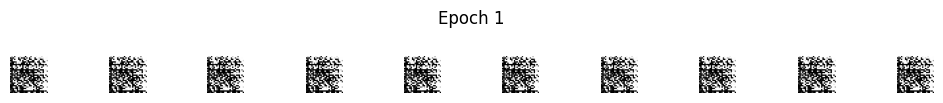

Epoch 6/20, D Loss: 1.1687, G Loss: 0.2114


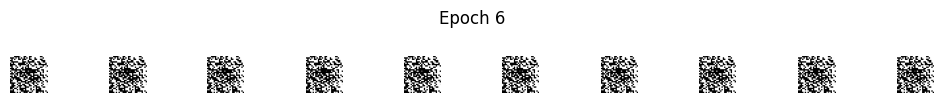

Epoch 11/20, D Loss: 1.2014, G Loss: 0.2066


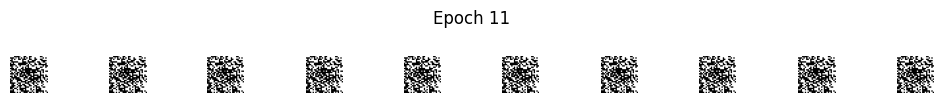

Epoch 16/20, D Loss: 1.2036, G Loss: 0.1969


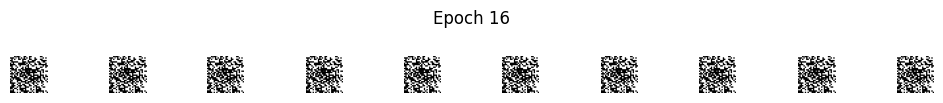

Epoch 20/20, D Loss: 1.2052, G Loss: 0.2017


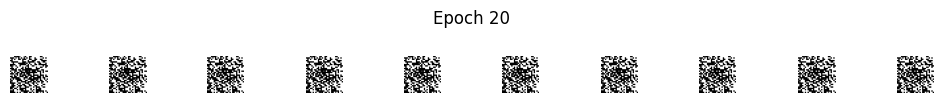


Training completed. Final generated images:


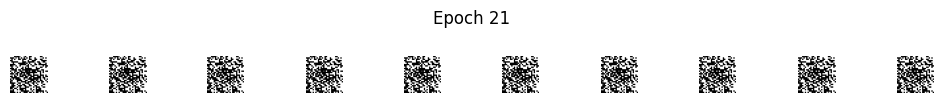

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Parameters
latent_dim = 64
img_shape = (28, 28, 1)
batch_size = 32
epochs = 20
display_interval = 5

# Load smaller subset of MNIST
(X_train, _), (_, _) = keras.datasets.mnist.load_data()
X_train = X_train[:15000] / 255.0
X_train = np.expand_dims(X_train, axis=3).astype('float32')

# Generator with Input layer first
def build_generator():
    model = keras.Sequential([
        keras.Input(shape=(latent_dim,)),
        layers.Dense(64 * 7 * 7),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Reshape((7, 7, 64)),
        layers.Conv2DTranspose(32, (4, 4), strides=(2, 2), padding='same'),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2DTranspose(16, (4, 4), strides=(2, 2), padding='same'),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(1, (7, 7), activation='sigmoid', padding='same')
    ])
    return model

# Discriminator with Input layer first
def build_discriminator():
    model = keras.Sequential([
        keras.Input(shape=img_shape),
        layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same'),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Dropout(0.25),
        layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same'),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Build and compile models
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
                     optimizer=keras.optimizers.Adam(0.0002, 0.5),
                     metrics=['accuracy'])

generator = build_generator()

# Create GAN
discriminator.trainable = False
gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(0.0002, 0.5))

# Fixed noise for consistent previews
fixed_noise = tf.random.normal([10, latent_dim])

# Training loop with robust gradient handling
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        # Shuffle data each epoch
        idx = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[idx]

        for batch in range(0, len(X_train_shuffled), batch_size):
            # Get real images for current batch
            real_images = X_train_shuffled[batch:batch+batch_size]
            if len(real_images) == 0:  # Skip empty batches
                continue

            # Generate fake images
            noise = tf.random.normal([len(real_images), latent_dim])
            fake_images = generator(noise, training=True)

            # Combine real and fake images
            combined_images = tf.concat([real_images, fake_images], axis=0)
            labels = tf.concat([tf.ones((len(real_images), 1)) * 0.9,
                              tf.zeros((len(fake_images), 1))], axis=0)

            # Add noise to labels for stability
            labels += 0.05 * tf.random.uniform(tf.shape(labels))

            # Train discriminator
            with tf.GradientTape() as disc_tape:
                predictions = discriminator(combined_images, training=True)
                d_loss = keras.losses.binary_crossentropy(labels, predictions)
                d_loss = tf.reduce_mean(d_loss)

            gradients = disc_tape.gradient(d_loss, discriminator.trainable_variables)
            if gradients and all(g is not None for g in gradients):  # Proper gradient check
                discriminator.optimizer.apply_gradients(zip(gradients, discriminator.trainable_variables))

            # Train generator
            noise = tf.random.normal([len(real_images), latent_dim])
            with tf.GradientTape() as gen_tape:
                fake_images = generator(noise, training=True)
                predictions = discriminator(fake_images, training=True)
                g_loss = keras.losses.binary_crossentropy(tf.ones_like(predictions), predictions)
                g_loss = tf.reduce_mean(g_loss)

            gradients = gen_tape.gradient(g_loss, generator.trainable_variables)
            if gradients and all(g is not None for g in gradients):  # Proper gradient check
                gan.optimizer.apply_gradients(zip(gradients, generator.trainable_variables))

        # Show progress
        if epoch % display_interval == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch+1}/{epochs}, D Loss: {d_loss:.4f}, G Loss: {g_loss:.4f}")
            show_progress(epoch, generator)

# Display function
def show_progress(epoch, generator):
    generated_images = generator(fixed_noise, training=False)

    plt.figure(figsize=(10, 1))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray', vmin=0, vmax=1)
        plt.axis('off')
    plt.suptitle(f'Epoch {epoch+1}')
    plt.tight_layout()
    plt.show()

# Start training
print("Starting training...")
train_gan(epochs, batch_size)

# Final output
print("\nTraining completed. Final generated images:")
show_progress(epochs, generator)